## Yacine Mahdid May 30 2020
The goal of this notebook is to generate the visualization from the results gathered in the first phase. This step is separated from result generation as we don't need lots of computing power for visualization.

### Steps:
- [ ] Double check that all the results are in the right format and can be unpickled
- [ ] Generate Violin plot for the bootstrap confidence interval
- [ ] Generate Feature importance plot


In [61]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from ml_tools.classification import load_pickle

# Double checking that all the results are in the right format and can be unpickled
input_dir = '/home/yacine/Documents/BIAPT/eeg_pain_result/'
output_dir = '/home/yacine/Documents/BIAPT/eeg_pain_result/'

# Basic information
features_filename = input_dir + 'features_all.csv'

# Clf performance
acc_filename = input_dir + 'accuracies_result.pickle'
f1_filename = input_dir + 'f1s_result.pickle'

# Clf validation
best_params_filename = input_dir + 'best_params.pickle'
bootstrap_filename = input_dir + 'bootstrap.pickle'
permutation_filename = input_dir + 'permutation_test.pickle'

# Final Clf explanability information
clf_filename = input_dir + 'trained_gs.pickle'
features_weight_filename = input_dir + 'features.pickle'


In [46]:
# Original dataframe used to generate the result
df = pd.read_csv(features_filename)

In [32]:
accuracies = load_pickle(acc_filename)
f1s = load_pickle(f1_filename)

(0.5990924863068806, 0.6752598823249065)


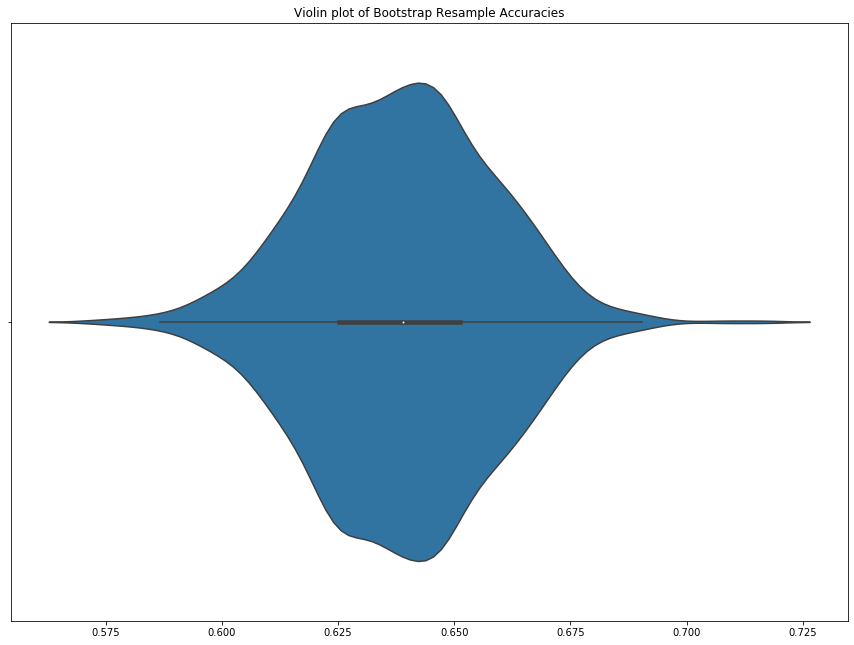

In [101]:
# Will need to double check how I'm doing this I'm getting difficult to parse result
best_params = load_pickle(best_params_filename)

# This is a dictionary with two key: distribution and interval
bootstrap = load_pickle(bootstrap_filename)
#bootstrap['distribution']
print(bootstrap['interval'])

fig_name = output_dir + 'bootstrap_resampling.png'
fig = plt.gcf()
ax = sns.violinplot(bootstrap['distribution'])
ax.set_title("Violin plot of Bootstrap Resample Accuracies")
fig.set_size_inches((15, 11), forward=False)
fig.savefig(fig_name, dpi=500)

# This is the n run of the permutation testing
permutation = load_pickle(permutation_filename)

In [34]:
# Trained classifier (Where is this one coming from?)
clf = load_pickle(clf_filename)

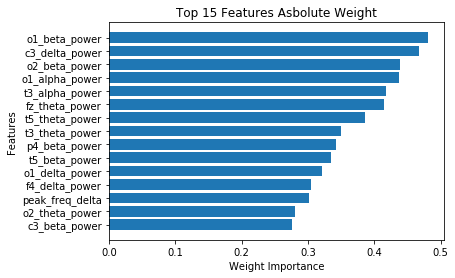

In [96]:
# This might be better as a dataframe
features_weight = load_pickle(features_weight_filename)
len(features_weight['weight'])

def f_importances(coef, names, fig_name, top=-1):
    imp = abs(coef)
    imp,names = zip(*sorted(zip(imp,names)))
    
    # Show all features
    if top == -1:
        top = len(names)
        
    limit = len(names) - top
    
    plt.barh(range(top), imp[limit:], align='center')
    plt.yticks(range(top), names[limit:])
    plt.title(f"Top {top} Features Asbolute Weight")
    plt.xlabel("Weight Importance")
    plt.ylabel("Features")
        
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches((15, 11), forward=False)
    fig.savefig(fig_name, dpi=500)

weight_importance_filename = output_dir + 'f_importance.png'
f_importances(features_weight['weight'], features_weight['name'],  weight_importance_filename, 15)

In [97]:
features_weight['name']

['fp1_delta_power',
 'fp2_delta_power',
 'fz_delta_power',
 'f3_delta_power',
 'f4_delta_power',
 'f7_delta_power',
 'f8_delta_power',
 'cz_delta_power',
 'c3_delta_power',
 'c4_delta_power',
 't3_delta_power',
 't4_delta_power',
 't5_delta_power',
 't6_delta_power',
 'pz_delta_power',
 'p3_delta_power',
 'p4_delta_power',
 'o1_delta_power',
 'o2_delta_power',
 'peak_freq_delta',
 'fp1_delta_wpli',
 'fp2_delta_wpli',
 'fz_delta_wpli',
 'f3_delta_wpli',
 'f4_delta_wpli',
 'f7_delta_wpli',
 'f8_delta_wpli',
 'cz_delta_wpli',
 'c3_delta_wpli',
 'c4_delta_wpli',
 't3_delta_wpli',
 't4_delta_wpli',
 't5_delta_wpli',
 't6_delta_wpli',
 'pz_delta_wpli',
 'p3_delta_wpli',
 'p4_delta_wpli',
 'o1_delta_wpli',
 'o2_delta_wpli',
 'fp1_theta_power',
 'fp2_theta_power',
 'fz_theta_power',
 'f3_theta_power',
 'f4_theta_power',
 'f7_theta_power',
 'f8_theta_power',
 'cz_theta_power',
 'c3_theta_power',
 'c4_theta_power',
 't3_theta_power',
 't4_theta_power',
 't5_theta_power',
 't6_theta_power',
 'pz_